## Training area for agents in Hunger Maze

In [1]:
# Imports
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import matplotlib.pyplot as plt
import maze_generator.maze_dataset as md
from Maze_env.reward_functions.maze_runner import MazeRunnerRewardsFun
import numpy as np
from DQN.training.basic import BaseTraining
from DQN.agents.hungermaze import HungerGamesAgent

import DQN.models.base as base
import os
print(os.getcwd())

/home/cody/Documents/DataSciBC/Generative_AI/maze_game/TrainingGround


### Define the Mazes

In [2]:
dataset = md.Maze_dataset(1,(3,3),maze_type = 'percolation')

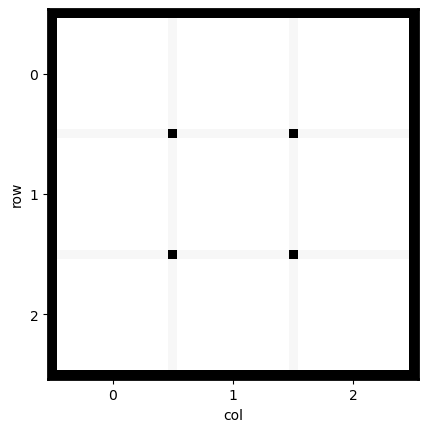

In [3]:
# example of the maze
dataset.show_maze(0)

In [4]:
# parameters for the agents
n_agents = 2
vision = 3

In [5]:
%matplotlib notebook


# --- Agents for the Hunger Games --- #
maze_agent =HungerGamesAgent({'agents':base.CNN_version1},
                               vision={'agents':vision},
                               action_type='cardinal',
                               dist_paradigm='path'
                               )

# --- trainer of the agent --- #
train = BaseTraining(name = 'HungerGames',
                              maze_dataset = dataset,
                              maze_agent = maze_agent,
                              len_game=50,
                              n_objects={'agents':n_agents},
                              final_epsilon = 0.05,
                              gamma = 0.99,
                              tau = 0.0001,
                               batch_size = 64,
                              n_frames = 500000,
                              lr = 0.0005,
                              lr_heads=0.0005,
                              lr_step_size=5000,
                              lr_head_step_size=2500,
                              lr_gamma = 0.98,
                              lr_head_gamma = 0.98,
                              l2_regular=0.01,
                              replay_buffer_size=100000,
                              replay_buffer_min_perc=0.1,
                              target_update=5000,
                              policy_update=1,
                              lambda_entropy=0.1,
                              beta = 0.4,
                              alpha = 0.6,
                              decay_total = 100000,
                              per = True,
                              frame_mult=1.5,
                              )
train.train(test_agent=True,peak=False)

{'agents': <Maze_env.reward_functions.hunger_games.HungerGamesRewardsFun object at 0x7fd0165ff5f0>}
----------------------------------
Basic epsilon decay scheduler:
Start epsilon: 1
End epsilon: 0.05
Decay total: 300000
Decay rate: 0.0009935761740440755

------------------------------
Group 0: Learning rate = 0.0005
--------------------------------------
Basis learning rate scheduler:
Step size: 5000
Gamma: 0.98


/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'dict'>
  logger.warn(


Current Score: {'agents': 0.18600000000000014}
cumulative reward: {'agents': [-40.61378600823045, -44.41543209876543]}
cumulative reward: {'agents': [-74.80864197530865, -104.3471193415638]}
cumulative reward: {'agents': [-99.68271604938272, -74.81666666666668]}
cumulative reward: {'agents': [-48.16172839506173, -34.62119341563786]}
cumulative reward: {'agents': [-26.73148148148148, -25.00843621399177]}
----------------------------------

frame [20000:480000] with loss 4.30182409286499
Learning rate : 0.00049
Epsilon: 0.9512875872993842
cumulative reward: {'agents': [-25.25, -26.572222222222223]}
cumulative reward: {'agents': [-112.49999999999999, -106.58251028806585]}
cumulative reward: {'agents': [-106.58251028806585, -96.60020576131686]}
cumulative reward: {'agents': [-112.49999999999999, -75.68827160493827]}
cumulative reward: {'agents': [-106.58251028806585, -106.58251028806585]}
Current Score: {'agents': 0.21600000000000016}
cumulative reward: {'agents': [-117.10432098765432, -75

/home/cody/Documents/DataSciBC/Generative_AI/maze_game/DQN/training/basic.py:631: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data = scores_df, x ='frame',y = 'score',ax = axe[1][1],palette='tab10')


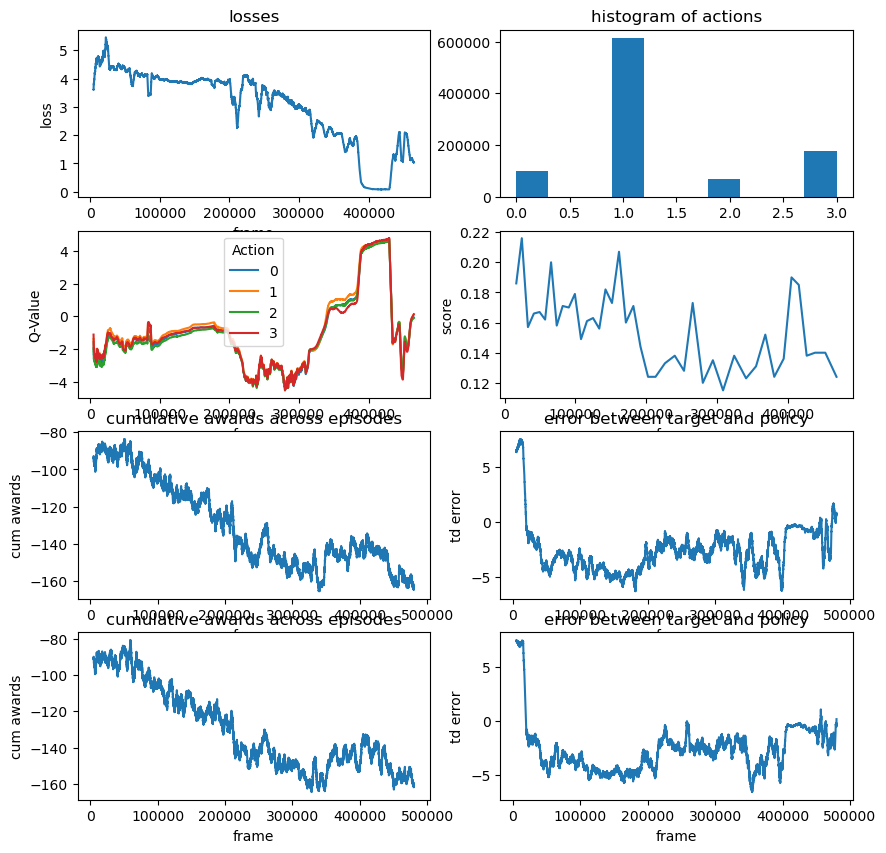

In [6]:
train.save()
train.results()

In [7]:
train.agents.test_agent(dataset,n_episodes=1000,len_game=15,num_objects={'agents':n_agents})

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'dict'>
  logger.warn(


{'agents': 0.12500000000000008}

In [8]:

train.agents.run_agent(dataset[0],num_objects={'agents':n_agents},n_episodes=20,len_game=15,epsilon=0,init_pos={})


cumulative reward: {'agents': [-106.94444444444444, -101.38888888888889]}
cumulative reward: {'agents': [-25.25, -26.572222222222223]}
cumulative reward: {'agents': [-110.07757201646089, -106.58251028806585]}
cumulative reward: {'agents': [-117.77592592592593, -98.88703703703702]}
cumulative reward: {'agents': [-106.94444444444444, -98.88703703703702]}
cumulative reward: {'agents': [-106.94444444444444, -106.58251028806585]}
cumulative reward: {'agents': [-112.18950617283949, -101.38888888888889]}
cumulative reward: {'agents': [-110.07757201646089, -109.16193415637858]}
cumulative reward: {'agents': [-33.44444444444444, -27.9417695473251]}
cumulative reward: {'agents': [-106.58251028806585, -117.10432098765432]}
cumulative reward: {'agents': [-74.91296296296298, -98.88703703703702]}
cumulative reward: {'agents': [-112.49999999999999, -112.49999999999999]}
cumulative reward: {'agents': [-103.71954732510288, -101.38888888888889]}
cumulative reward: {'agents': [-30.328600823045267, -32.33